#Análise de Satisfação de Bancos

Imagine que você e eu fomos contratados por uma instituição financeira de grande porte para analisar a satisfação dos clientes com os serviços prestados pela empresa. Como analistas de dados, nossa missão é coletar, processar e analisar um grande volume de dados para obter insights valiosos sobre o que os clientes pensam sobre a empresa, suas necessidades e expectativas.

Para começar, vamos coletar dados de diversas fontes, como pesquisas de satisfação, registros de atendimento ao cliente, feedbacks nas redes sociais e reclamações registradas em plataformas de avaliação de empresas. Com esses dados em mãos, podemos criar um banco de dados robusto e padronizado para análise.

Faça as seguintes análises

1. Analisar NPS de classificação de cada instituição
2. Calcular a % de elogios do app para cada instituição
3. Calcular a % de reclamações do app para cada instituição
4. Calcular a % de elogios a instituição para cada instituição
5. Calcular a % de reclamação a instituição para cada instituição
6. Plote um gráfico de linhas para entender a tendência das classificações por instituição

##Configuração dos dados

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Datasets/Satisfao com App.xlsx")

In [ ]:
df["Elogio quanto ao app"] = df["Elogio quanto ao app"].str.replace("NAO","NÃO")
df["Elogio quanto ao app"] = df["Elogio quanto ao app"].str.replace("NÃO","0")
df["Elogio quanto ao app"] = df["Elogio quanto ao app"].str.replace("SIM","1")
df["Reclamação quanto ao app"] = df["Reclamação quanto ao app"].str.replace("SIM","1")
df["Reclamação quanto ao app"] = df["Reclamação quanto ao app"].str.replace("NÃO","0")
df["Elogio a Instituição"] = df["Elogio a Instituição"].str.replace("SIM","1")
df["Elogio a Instituição"] = df["Elogio a Instituição"].str.replace("NÃO","0")
df["Reclamação a Instituição"] = df["Reclamação a Instituição"].str.replace("SIM","1")
df["Reclamação a Instituição"] = df["Reclamação a Instituição"].str.replace("NÃO","0")
df["Não Classificável"] = df["Não Classificável"].str.replace("SIM","1")
df["Não Classificável"] = df["Não Classificável"].str.replace("NÃO","0")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Instituição               8702 non-null   object        
 1   Comentario                8698 non-null   object        
 2   Data                      8702 non-null   datetime64[ns]
 3   Classificação             8702 non-null   int64         
 4   Elogio quanto ao app      8702 non-null   object        
 5   Reclamação quanto ao app  8702 non-null   object        
 6   Elogio a Instituição      8702 non-null   object        
 7   Reclamação a Instituição  8702 non-null   object        
 8   Não Classificável         8702 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 612.0+ KB


In [ ]:
df["Elogio quanto ao app"] = df["Elogio quanto ao app"].astype(int)
df["Elogio quanto ao app"] = df["Elogio quanto ao app"].astype(int)
df["Elogio quanto ao app"] = df["Elogio quanto ao app"].astype(int)
df["Reclamação quanto ao app"] = df["Reclamação quanto ao app"].astype(int)
df["Reclamação quanto ao app"] = df["Reclamação quanto ao app"].astype(int)
df["Elogio a Instituição"] = df["Elogio a Instituição"].astype(int)
df["Elogio a Instituição"] = df["Elogio a Instituição"].astype(int)
df["Reclamação a Instituição"] = df["Reclamação a Instituição"].astype(int)
df["Reclamação a Instituição"] = df["Reclamação a Instituição"].astype(int)
df["Não Classificável"] = df["Não Classificável"].astype(int)
df["Não Classificável"] = df["Não Classificável"].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Instituição               8702 non-null   object        
 1   Comentario                8698 non-null   object        
 2   Data                      8702 non-null   datetime64[ns]
 3   Classificação             8702 non-null   int64         
 4   Elogio quanto ao app      8702 non-null   int64         
 5   Reclamação quanto ao app  8702 non-null   int64         
 6   Elogio a Instituição      8702 non-null   int64         
 7   Reclamação a Instituição  8702 non-null   int64         
 8   Não Classificável         8702 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 612.0+ KB


In [ ]:
df.head()

,Instituição,Comentario,Data,Classificação,Elogio quanto ao app,Reclamação quanto ao app,Elogio a Instituição,Reclamação a Instituição,Não Classificável
0,Banco do Brasil,Muito bom ajuda muito,2019-07-21,5,1,0,0,0,0
1,Banco do Brasil,excelente,2019-07-21,5,1,0,0,0,0
2,Banco do Brasil,Bom,2019-07-21,5,1,0,0,0,0
3,Banco do Brasil,aplicativo muito top,2019-07-21,5,1,0,0,0,0
4,Banco do Brasil,Fácil e prático,2019-07-21,5,1,0,0,0,0


In [ ]:
df["Classificação"] = df["Classificação"].replace(2,-1)
df["Classificação"] = df["Classificação"].replace(1,-1)
df["Classificação"] = df["Classificação"].replace(5,1)
df["Classificação"] = df["Classificação"].replace(4,1)
df["Classificação"] = df["Classificação"].replace(3,0)

##NPS Instituição




In [ ]:
df.head()

,Instituição,Comentario,Data,Classificação,Elogio quanto ao app,Reclamação quanto ao app,Elogio a Instituição,Reclamação a Instituição,Não Classificável
0,Banco do Brasil,Muito bom ajuda muito,2019-07-21,1,1,0,0,0,0
1,Banco do Brasil,excelente,2019-07-21,1,1,0,0,0,0
2,Banco do Brasil,Bom,2019-07-21,1,1,0,0,0,0
3,Banco do Brasil,aplicativo muito top,2019-07-21,1,1,0,0,0,0
4,Banco do Brasil,Fácil e prático,2019-07-21,1,1,0,0,0,0


In [209]:
df_bancos_agrupados = df.groupby(["Instituição"])["Classificação"].agg("mean").sort_values().reset_index()
df_bancos_agrupados['Classificação'] = df_bancos_agrupados['Classificação']*100
df_bancos_agrupados

,Instituição,Classificação
0,Caixa Econômica Federal,42.413793
1,Banco Itau,56.954023
2,Nubank,58.529581
3,Banco Bradesco,68.236646
4,Banco do Brasil,78.160920


In [ ]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

<Axes: xlabel='Instituição', ylabel='Classificação'>

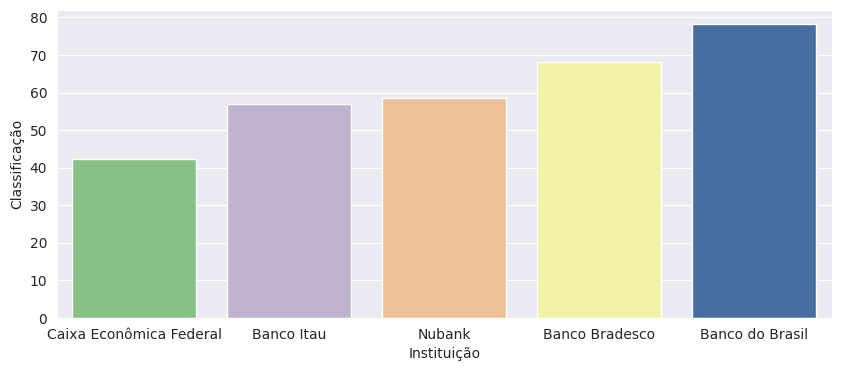

In [210]:
#O banco mais bem avaliado no quesito "Classificação" é o Banco do Brasil, seguido pelo Bradesco, Nubank, Itau e Caixa Econômica Federal

plt.subplots(figsize = (10,4))
sns.barplot(data = df_bancos_agrupados, x = 'Instituição', y= 'Classificação')

##% de elogios do app para cada instituição

In [ ]:
df.head()

,Instituição,Comentario,Data,Classificação,Elogio quanto ao app,Reclamação quanto ao app,Elogio a Instituição,Reclamação a Instituição,Não Classificável
0,Banco do Brasil,Muito bom ajuda muito,2019-07-21,1,1,0,0,0,0
1,Banco do Brasil,excelente,2019-07-21,1,1,0,0,0,0
2,Banco do Brasil,Bom,2019-07-21,1,1,0,0,0,0
3,Banco do Brasil,aplicativo muito top,2019-07-21,1,1,0,0,0,0
4,Banco do Brasil,Fácil e prático,2019-07-21,1,1,0,0,0,0


<Axes: xlabel='Instituição', ylabel='Elogio quanto ao app'>

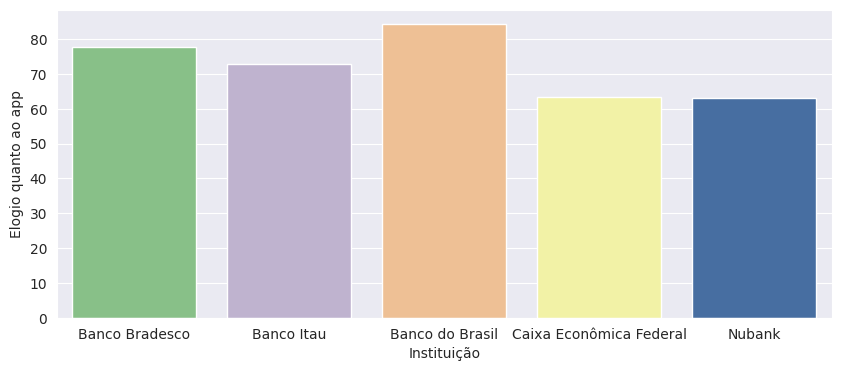

In [ ]:
#Calculando NPS da métrica de Elogio do APP
df_Elogio_App = df.groupby('Instituição')['Elogio quanto ao app'].mean().reset_index()
df_Elogio_App['Elogio quanto ao app'] = df_Elogio_App['Elogio quanto ao app']*100
plt.subplots(figsize = (10,4))
sns.barplot(x='Instituição', y = 'Elogio quanto ao app', data=df_Elogio_App)

In [211]:
df_Elogio_App

,Instituição,Elogio quanto ao app
0,Banco Bradesco,77.886272
1,Banco Itau,72.816092
2,Banco do Brasil,84.252874
3,Caixa Econômica Federal,63.505747
4,Nubank,63.009765


##% de reclamações do app para cada instituição

<Axes: xlabel='Instituição', ylabel='Reclamação quanto ao app'>

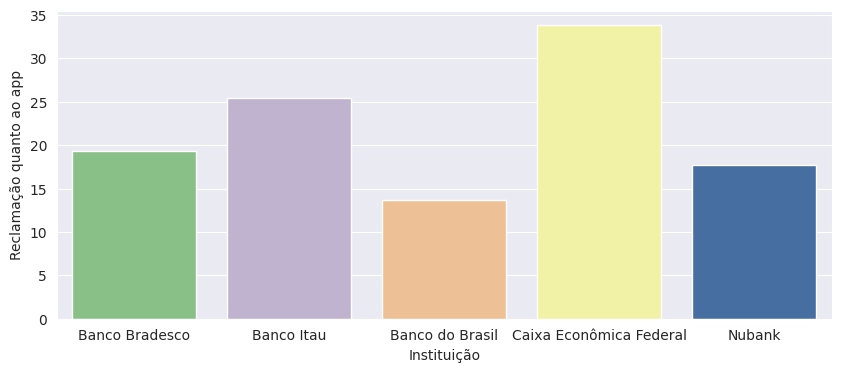

In [ ]:
#Calculando % de reclamação do app de cada instituição

df_reclamacao_App = df.groupby('Instituição')['Reclamação quanto ao app'].mean().reset_index()
df_reclamacao_App['Reclamação quanto ao app'] = df_reclamacao_App['Reclamação quanto ao app']*100
plt.subplots(figsize = (10,4))
sns.barplot(x='Instituição', y = 'Reclamação quanto ao app', data=df_reclamacao_App)

##% de elogios a instituição para cada instituição

<Axes: xlabel='Instituição', ylabel='Elogio a Instituição'>

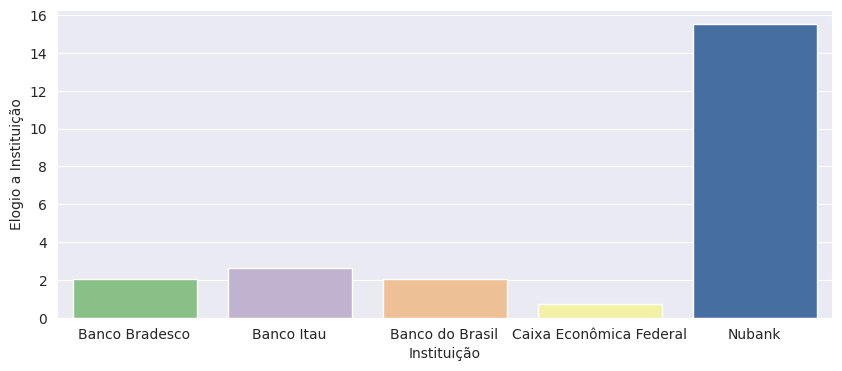

In [ ]:
#Calculando % de elogio de cada instituição

df_elogio_instituicao = df.groupby('Instituição')['Elogio a Instituição'].mean().reset_index()
df_elogio_instituicao['Elogio a Instituição'] = df_elogio_instituicao['Elogio a Instituição']*100
plt.subplots(figsize = (10,4))
sns.barplot(x='Instituição', y = 'Elogio a Instituição', data=df_elogio_instituicao)

##% de reclamações a instituição para cada instituição

<Axes: xlabel='Instituição', ylabel='Reclamação a Instituição'>

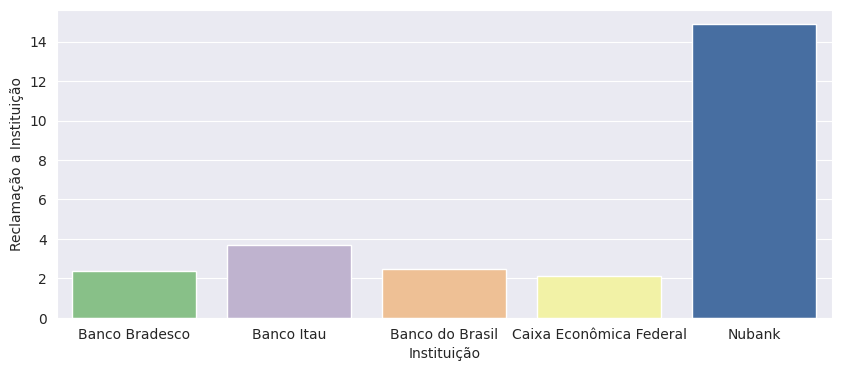

In [ ]:
#Calculando % de reclamação cada instituição

df_reclamacao_instituicao = df.groupby('Instituição')['Reclamação a Instituição'].mean().reset_index()
df_reclamacao_instituicao['Reclamação a Instituição'] = df_reclamacao_instituicao['Reclamação a Instituição']*100
plt.subplots(figsize = (10,4))
sns.barplot(x='Instituição', y = 'Reclamação a Instituição', data=df_reclamacao_instituicao)

In [212]:
df.head()

,Instituição,Comentario,Data,Classificação,Elogio quanto ao app,Reclamação quanto ao app,Elogio a Instituição,Reclamação a Instituição,Não Classificável
0,Banco do Brasil,Muito bom ajuda muito,2019-07-21,1,1,0,0,0,0
1,Banco do Brasil,excelente,2019-07-21,1,1,0,0,0,0
2,Banco do Brasil,Bom,2019-07-21,1,1,0,0,0,0
3,Banco do Brasil,aplicativo muito top,2019-07-21,1,1,0,0,0,0
4,Banco do Brasil,Fácil e prático,2019-07-21,1,1,0,0,0,0


<Axes: xlabel='Data', ylabel='Classificação'>

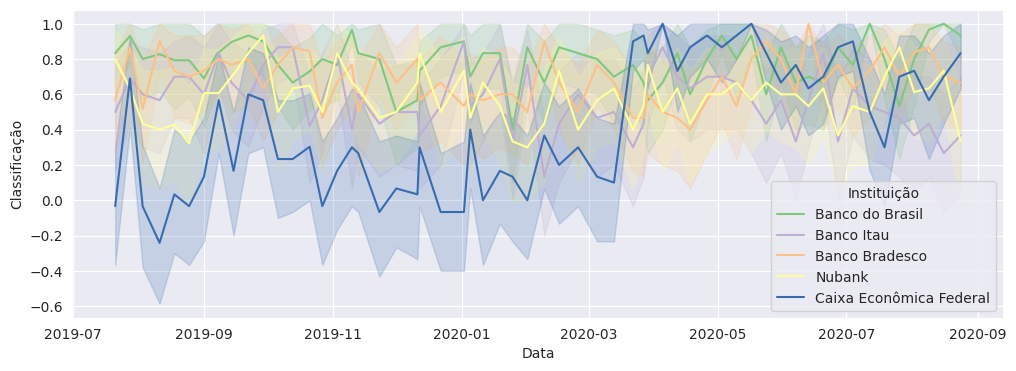

In [216]:
plt.subplots(figsize = (12,4))


sns.lineplot(data = df, x = 'Data',  y = 'Classificação', hue = 'Instituição')